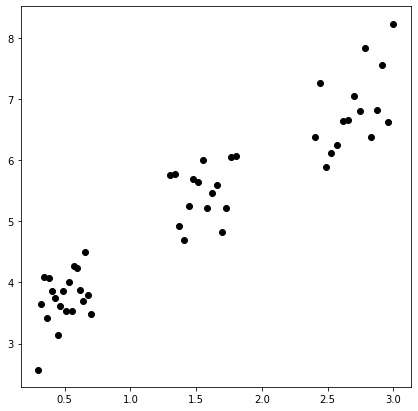

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
 
np.random.seed(100)
num_data = 50
 
x11 = np.linspace(0.3,0.7,20)
x12 = np.linspace(1.3,1.8,15)
x13 = np.linspace(2.4,3,15)
x1 = np.concatenate((x11,x12,x13),axis=None)
error = np.random.normal(1,0.5,num_data)
x2 = 1.5*x1+2+error
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
plt.scatter(x1, x2, color='k')
plt.show()

In [4]:
def kmeans_clustering(X, n_clusters, init_center=None, max_iter=10, epsilon=1e-4, random_state=100): 
    # inititalize centeroids
    if init_center is None:
        random.seed(random_state)
        idx = random.sample(range(X.shape[0]), n_clusters)
        center = X[idx,:]
    else:
        center = init_center
    iteration = 1
    
    labels_history = [] # label history 
    center_history = [] # centeroid history
    while(iteration<=max_iter):
        ## assign label
        labels = []
        for i in range(X.shape[0]):
            data = X[i, :]
            labels.append(np.argmin([np.linalg.norm(data-x) for x in center]))
        
        labels = np.array(labels)
        ## update centeroids
        next_center = []
        for i in range(n_clusters):
            target_idx = np.where(labels==i)[0]
            center_val = np.mean(X[target_idx,:], axis=0)
            next_center.append(center_val)
 
        next_center = np.array(next_center)
        if epsilon:
            if np.linalg.norm(next_center-center) <= epsilon:
                break
        center = next_center
        labels_history.append(labels)
        center_history.append(center)
        iteration += 1
    return (labels, iteration, labels_history, center_history)

In [5]:
X = np.stack([x1, x2], axis=1)
 
init_center= np.array([[2,4],[1,5],[2.5,6]])
max_iter=50
epsilon=1e-10
random_state=101
n_clusters=3
results = kmeans_clustering(X, n_clusters, init_center, max_iter, epsilon=1e-4, 
                           random_state=100)
labels = results[0]

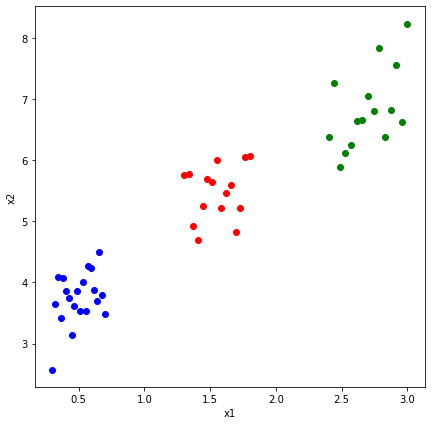

In [6]:
fig = plt.figure(figsize=(7,7))
fig.set_facecolor('white')
for i, label in enumerate(labels):
    if label == 0:
        color = 'blue'
    elif label ==1:
        color = 'red'
    else:
        color = 'green'
    plt.scatter(X[i,0],X[i,1], color=color)
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

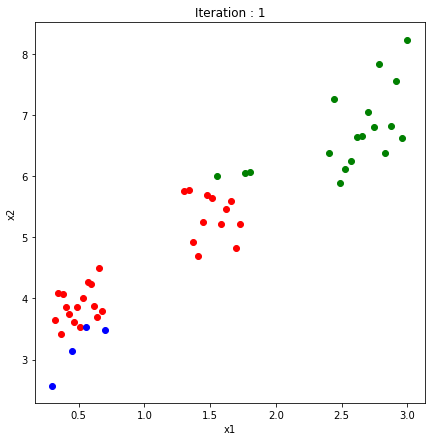

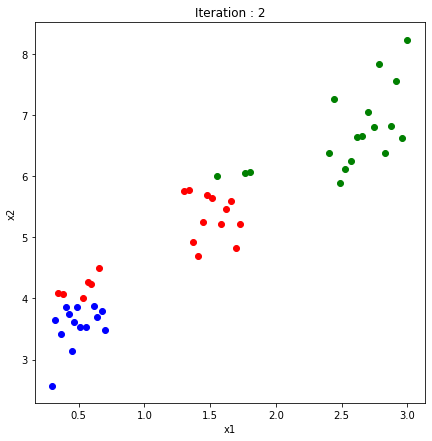

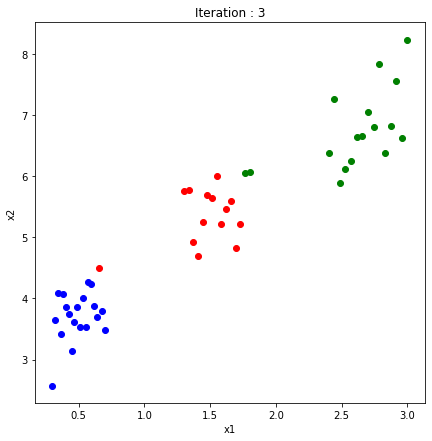

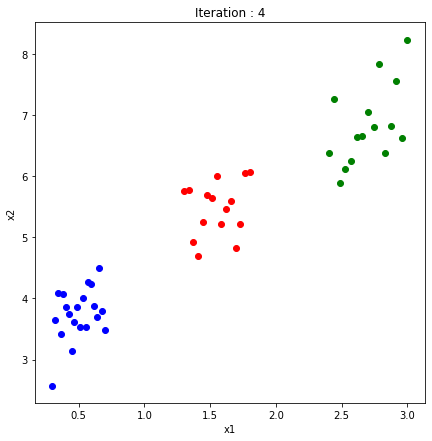

In [7]:
labels_history = results[2]
for j, labels in enumerate(labels_history):
    fig = plt.figure(figsize=(7,7))
    fig.set_facecolor('white')
    for i, label in enumerate(labels):
        if label == 0:
            color = 'blue'
        elif label ==1:
            color = 'red'
        else:
            color = 'green'
        plt.scatter(X[i,0],X[i,1], color=color)
    plt.title(f'Iteration : {j+1}')
    plt.xlabel('x1')
    plt.ylabel('x2')
plt.show()